# **FINANCIAL & MACROECONOMICS ANALYSIS : PHASE 1**
DOMAIN: FINANCE

---



# **Introduction**

*The intersection of financial markets and macroeconomic policy represents one of the most complex systems in modern global society. This project provides a data-driven exploration of that relationship, specifically focusing on the pivotal 2000–2008 economic cycle. By analyzing the movement of stock indices alongside indicators like inflation, interest rates, and consumer sentiment, this study seeks to uncover the underlying mechanics that drive market stability and economic growth.*



# **Project Overview**

*This project utilizes a multi-dimensional approach to analyze the "Anatomy of an Economic Cycle." It transitions from raw daily market data to aggregated annual insights, allowing for a clear view of how high-level policy decisions (like interest rate shifts) impact "on-the-ground" realities such as retail sales and corporate profitability.*

# **Objective**

*The primary objective is to quantify the influence of macroeconomic variables on financial market volatility and performance. By identifying the "Stability Zone" of interest rates and the correlation between GDP and corporate profits, the project aims to establish a framework for understanding market regimes.*

# **Problem Definition**

*Despite the abundance of daily financial and macroeconomic data, investors and policymakers often struggle to accurately and proactively assess the interconnected risk landscape driven by both micro-level market volatility (e.g., stock prices) and macro-level economic shifts (e.g., inflation and interest rates).*

***(1)Quantifying the Lagged Impact***: *Understanding how and when macroeconomic variables (like GDP growth or inflation) translate into discernible movements in financial markets (like stock index prices) or changes in consumer spending.*

***(2) Integrating Diverse Data***: *Developing a unified, interpretable framework that leverages the daily time-series nature of the data to provide timely, evidence-based forecasts for key economic indicators, moving beyond traditional, slower-to-update reporting.*

# **Aim Of The Project**

*1. Forecast market trends using 50/200-day moving average crossovers.*

*2. Quantify macro influence on stock prices and corporate profits.*

*3. Analyze consumer confidence as a predictor of retail spending.*

*4. Develop a risk dashboard to monitor economic stability zones.*



---



# **FINANCIAL & MACROECONOMIC ANALYSIS : PHASE 2**

*Objective: To clean and transform raw data into a structured, analytical format. This involves correcting data types, creating derived financial indicators like daily returns and volatility, and calculating macro-adjusted metrics. These steps ensure the dataset is accurate, consistent, and ready for insightful modeling and professional visualization.*

# **1. Data Loading and Initial Overview**

**1.1 Import Libraries and Import dataset**

*In this step, we import essential libraries for data analysis: pandas for dataframe, numpy for calculations, and matplotlib/seaborn for visualizations.*

In [31]:
# import libraries
import pandas as pd # for dataframe
import numpy as np # for calculations
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations

**1.1.a Loading the Dataset**

In [32]:
from google.colab import files
files_to_load= files.upload() # Locating path of the dataset

Saving finance_economics_dataset.csv to finance_economics_dataset (1).csv


In [33]:
df = pd.read_csv('finance_economics_dataset.csv') # load the dataset
df.head() # display first 5 rows

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


**1.2 Understanding the Dataset Structure**

*Before cleaning, we must understand the shape of the data and the type of information stored in each column.*

In [34]:
# Display basic information about the dataset
print("Dataset Dimensions: ", df.shape) # shows no. of rows and no. of columns
print("-" *30)
df.info()

Dataset Dimensions:  (3000, 24)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest 

**Observation:**

*1. The dataset contains 3,000 rows and 24 columns.*

*2. Most columns are numerical (float64 or int64), which is ideal for statistical analysis.*

**1.3 Statistical Summary**

*Use .describe() to look for outliers or unusual distributions in our financial and economic data.*

In [35]:
# Statistical summary of numerical columns
df.describe().T# Transposed for better readability

,count,mean,std,min,25%,50%,75%,max
Open Price,3000.0,2.982095e+03,1.151863e+03,1000.05,1.994983e+03,2.970780e+03,3.974690e+03,4.998230e+03
Close Price,3000.0,2.981249e+03,1.151784e+03,954.52,1.997425e+03,2.977180e+03,3.982082e+03,5.034130e+03
Daily High,3000.0,3.018888e+03,1.151683e+03,1012.13,2.035952e+03,3.006520e+03,4.015217e+03,5.076190e+03
Daily Low,3000.0,2.944330e+03,1.151835e+03,917.17,1.955398e+03,2.939245e+03,3.934088e+03,4.977060e+03
Trading Volume,3000.0,5.033864e+08,2.859004e+08,1636024.00,2.545224e+08,5.033710e+08,7.537963e+08,9.999771e+08
GDP Growth (%),3000.0,2.608903e+00,4.287337e+00,-5.00,-1.012500e+00,2.725000e+00,6.242500e+00,1.000000e+01
Inflation Rate (%),3000.0,5.096830e+00,2.910513e+00,0.01,2.607500e+00,5.110000e+00,7.600000e+00,1.000000e+01
Unemployment Rate (%),3000.0,8.663787e+00,3.737536e+00,2.00,5.450000e+00,8.710000e+00,1.188250e+01,1.500000e+01
Interest Rate (%),3000.0,5.218237e+00,2.726115e+00,0.50,2.890000e+00,5.250000e+00,7.492500e+00,1.000000e+01
Consumer Confidence Index,3000.0,8.503600e+01,2.022483e+01,50.00,6.800000e+01,8.600000e+01,1.030000e+02,1.190000e+02


**Observation:**

*1. **Market Diversity**: The dataset captures a wide spectrum of stock market behavior, with the Close Price varying by over $400\%$. This suggests the data likely covers various market cycles (bull and bear markets).*

*2. **Economic Extremes**: The macro indicators show high volatility. A GDP Growth range of $-5\%$ to $+10\%$ indicates the presence of both deep recessions and extreme economic booms.*

*3. **Liquidity Insights**: The Trading Volume shows a very high standard deviation relative to its mean. This tells us that market liquidity is not constant; there are specific "high-activity" periods likely triggered by the macro shocks seen in the inflation or interest rate columns.*

*4. **Currency & Commodity Benchmarks**: With Crude Oil ranging from $\$20$ to $\$150$ and Gold moving between $\$800$ and $\$2,500$, we have a perfect setup to analyze how "Hard Assets" (commodities) hedge against "Paper Assets" (stocks) during inflation spikes.*

*5. **Labor Market Dynamics**: The Unemployment Rate shows a mean of $8.66\%$,
but peaks at $15\%$. This suggests the dataset captures "Crisis Levels" of
unemployment (similar to the 2008 crash or 2020 pandemic), providing a great opportunity to analyze how the Stock Index behaves during labor market distress.*

*6. **Corporate Profitability Scale**: There is a massive gap between the minimum Corporate Profits ($\$100$ Billion) and the maximum ($\$4,999$ Billion). This $50\text{x}$ growth suggests the data spans a long timeline or encompasses significant structural economic shifts.*

*7. **Currency Fluctuations**: The Forex USD/JPY rate has a wide range ($80$ to $150$). Since Japan is a major trading partner and the Yen is a "carry trade" currency, these fluctuations likely correlate strongly with global risk appetite.*

*8. **Consumer Sentiment Floor**: The Consumer Confidence Index never drops below $50$. In economic terms, a score of $100$ is usually the baseline; the fact that the mean is $85$ suggests that for a large portion of this dataset, consumers were leaning towards a "pessimistic" outlook.*

*9. **Government Leverage**: Government Debt reaches nearly $\$30$ Trillion ($29,991$ Billion). We can use this to investigate the "Debt-to-GDP" relationship and see if massive debt spikes precede or follow market crashes.*

*10. **Retail vs. Spending**: The maximum Retail Sales ($\$9,998$ B) is significantly lower than the maximum Consumer Spending ($\$14,990$ B). This difference represents spending on "Services" (like healthcare and travel), which often behaves differently than physical retail goods during a recession.*

*11. **Data Readiness**: Since the count for all columns is consistently $3,000$ and no nulls exist, the dataset is "internally consistent," meaning we can perform complex multivariate analysis (like comparing Debt vs. GDP) without worrying about skewed results from missing data.*

**1.4 Checking for Data Integrity**

*We check for missing values and duplicates to ensure the reliability of our insights.*

In [36]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column : \n", missing_values[missing_values>0])

# Check for duplicates
print(f"Total Duplicate Rows: {df.duplicated().sum()}")

Missing values per column : 
 Series([], dtype: int64)
Total Duplicate Rows: 0


**Observation**

*The dataset is remarkably clean with zero missing values and no duplicate rows. This allows us to move directly into feature engineering and advanced analysis without heavy imputation.*

# **2. Data Pre-Processing**

*Now we move to Pre-processing. This is where we transform the raw data into "Analytical Gold" by creating features that don't exist yet but are vital for finance.*

**2.1 Type Conversion and Indexing**

*In this step, we prepare the dataset for time-series analysis. We convert the Date to a datetime object, ensure chronological order, and standardize currency columns to float for numerical precision.*

In [37]:
# 1. Convert Date to datetime object and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 2. Convert USD-related integer columns to float
# Financial values in Billions should be floats to allow for precise calculations
usd_cols = [col for col in df.columns if 'USD' in col and df[col].dtype == 'int64']

for col in usd_cols:
  df[col] = df[col].astype(float)
  print(f"Converted {col} to float.")

# 3. Set Date as the Index
df.set_index('Date', inplace=True)

# Display updated data types for verification
print("-" * 30)
print(df[usd_cols].dtypes)
df.head()

Converted Government Debt (Billion USD) to float.
Converted Corporate Profits (Billion USD) to float.
Converted Retail Sales (Billion USD) to float.
Converted Consumer Spending (Billion USD) to float.
------------------------------
Government Debt (Billion USD)      float64
Corporate Profits (Billion USD)    float64
Retail Sales (Billion USD)         float64
Consumer Spending (Billion USD)    float64
dtype: object


,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,6.06,...,1.04,119.87,47.20,1052.34,390.23,2229.0,2.12,3,76.64,4589.0
2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,2.19,...,1.00,98.22,52.84,1957.73,346.23,4156.0,1.40,21,5.67,10101.0
2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,0.82,...,0.83,80.13,78.80,2339.49,439.46,340.0,0.79,48,39.43,13665.0
2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,3.71,...,0.95,149.15,28.18,1308.54,213.07,8456.0,4.22,16,12.83,5192.0
2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,4.56,...,1.43,113.71,92.20,2210.08,405.49,1596.0,2.21,34,86.37,10688.0


**Observation**

***1**. **Temporal Consistency**: By setting the Date as the index, we enable Pandas' powerful time-series slicing (e.g., easily selecting data from a specific year or month).*

***2**. **Data Precision**: Converting columns like Government Debt and Corporate Profits to float prevents potential data loss during normalization or division operations later in the analysis.*

**2.2 Creating New Columns (Advanced Engineering)**

*In this section, we derive new metrics that provide deeper context than raw numbers alone. We focus on daily returns, volatility (30-day), real interest rate, trend indicators, market volatility proxies, and inter-market ratios.*


In [38]:
# 1. Calculate Daily Percentage Returns correctly for each index
df['Daily_Return_Pct'] = df.groupby('Stock Index')['Close Price'].pct_change() * 100

# 2. Calculate Market Volatility (30-day Rolling Standard Deviation of returns)
df['Market_Volatility_30d'] = df.groupby('Stock Index')['Daily_Return_Pct'].transform(lambda x: x.rolling(30).std())# We use .transform to ensure the output aligns perfectly with the original dataframe rows

# 3. Calculate Real Interest Rate
df['Real_Interest_Rate'] = df['Interest Rate (%)'] - df['Inflation Rate (%)']

# 4. Create Price-to-Earnings Proxy (Market Cap/Corporate Profits)
# Using Close Price as a proxy for Market valuation
df['Valuation_Ratio'] = df['Close Price'] / df['Corporate Profits (Billion USD)']

# 5. Technical Indicators: Simple Moving Averages (SMA)
df['SMA_50'] = df.groupby('Stock Index')['Close Price'].transform(lambda x: x.rolling(50).mean())
df['SMA_200'] = df.groupby('Stock Index')['Close Price'].transform(lambda x: x.rolling(200).mean())

# 6. Daily Price Spread
# Measures the intraday volatility (High vs Low)
df['HL_Spread'] = df['Daily High'] - df['Daily Low']

# 7. Volume Momentum
# A significant spike in volume often precedes a major price move
df['Volume_Change_Pct'] = df['Trading Volume'].pct_change() * 100

# 8. Gold-to-Oil Ratio
# Historically used to measure economic health and inflation expectations
df['Gold_Oil_Ratio'] = df['Gold Price (USD per Ounce)'] / df['Crude Oil Price (USD per Barrel)']

# 9. Price Direction
# 1 if price went up compared to yesterday, 0 if it went down
df['Price_Direction'] = (df['Daily_Return_Pct'] > 0).astype(int)

# Drop the first few rows that now contain NaN from the rolling/pct_change calculations
df.dropna(inplace=True)

# Drop rows with NaN values created by rolling windows (e.g., the first 200 rows)
df.dropna(inplace=True)

print("New columns added successfully. Shape:", df.shape)

df.head()

New columns added successfully. Shape: (2403, 33)


,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),...,Daily_Return_Pct,Market_Volatility_30d,Real_Interest_Rate,Valuation_Ratio,SMA_50,SMA_200,HL_Spread,Volume_Change_Pct,Gold_Oil_Ratio,Price_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2001-07-27,S&P 500,2285.98,2318.16,2332.50,2281.63,970789934,5.07,1.90,13.99,3.89,...,-13.111467,92.049508,1.99,0.861449,3067.1638,2866.95680,50.87,22.703040,29.145516,0
2001-07-29,S&P 500,1904.12,1918.85,1961.90,1865.05,614452879,3.39,7.13,5.22,9.14,...,-17.225299,91.984098,2.01,0.916356,3057.9364,2866.37015,96.85,-6.979624,11.117103,0
2001-07-30,S&P 500,3561.90,3524.73,3565.39,3517.15,627503111,-4.31,9.85,4.40,9.77,...,83.689710,85.872485,-0.08,2.281379,3068.3662,2874.08290,48.24,2.123878,29.858607,1
2001-08-01,S&P 500,3413.97,3462.22,3470.86,3368.10,796528135,4.42,2.71,5.43,2.33,...,-1.773469,85.338143,-0.38,1.024325,3084.5588,2880.77020,102.76,235.192015,23.056055,0
2001-08-03,S&P 500,3591.27,3585.18,3594.35,3544.63,879090441,3.06,9.79,10.56,4.44,...,3.551479,85.368063,-5.35,1.376797,3056.1544,2892.33975,49.72,49.451402,29.732230,1


**Observation :**

***1**. **Daily Returns**: Converting raw prices into percentage changes normalizes the data. This allows us to compare the volatility of a $\$5,000$ index directly with a $\$1,000$ index. It shifts the focus from "price points" to "investor profit/loss".*

***2**. **Market Volatility**: By calculating the rolling standard deviation, we have transformed a static price into a dynamic Risk Metric. This column will allow us to identify "Clustered Volatility"—periods where high-risk days follow each other, typically during economic uncertainty or market crashes.*

***3**. **Real Interest Rate**: This is a critical economic indicator. The nominal interest rate can be misleading if inflation is high. We can now see the actual cost of borrowing. A negative real interest rate suggests that the "purchasing power" of money is eroding faster than the interest being earned, which often drives investors toward the stock market or gold.*

***4**. **Valuation Ratio** : This acts as a simplified "P/E Ratio" (Price-to-Earnings) for the entire index. It helps us identify if the market is overvalued (price rising much faster than corporate profits) or undervalued (profits growing but price remaining stagnant).*

***5**. **Golden Cross / Death Cross**: By creating SMA_50 and SMA_200, we can now programmatically detect "Golden Crosses" (when the 50-day average moves above the 200-day), which is a major bullish signal in finance.*

***6**. **Intraday Volatility**: The HL_Spread allows us to see if the market is becoming "choppy" even if the Close price remains stable.*

***7**. **Inter-commodity Insights**: The Gold_Oil_Ratio is a "Power Feature." A high ratio often signals economic distress or a preference for safe-haven assets (Gold) over industrial energy (Oil).*

***8**. **Predictive Readiness**: By adding Price_Direction, we have essentially prepared the dataset for predicting whether the market will go up or down.*

****9**. **Data Integrity Note***: We applied .dropna() to remove the initial $30$ rows. This is a necessary "cleanup" step because rolling calculations require a window of previous data to function; without this, the first month of the dataset would contain biased or empty results.*



---




# **FINANCIAL & MACROECONOMIC ANALYSIS : PHASE 3**

*Objective: To perform an end-to-end exploratory data analysis (EDA) on a comprehensive dataset containing stock market performance and macroeconomic indicators. This analysis seeks to uncover how economic variables like GDP, Inflation, and Interest Rates influence market movements.*

# **3. Exploratory Data Analysis (EDA)**

*In this section, we perform transition from data preparation to discovery. We use statistical techniques to uncover the relationships between the stock market and the broader economy.*

**3.1 Multivariate Correlation Analysis**

*We start by examining how the stock market interacts with macroeconomic indicators. Understanding these correlations helps identify which factors act as "Leading Indicators" for market movements.*

In [39]:
# Select core columns for analysis
core_cols = [
    'Close Price', 'Daily_Return_Pct', 'Market_Volatility_30d',
    'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)',
    'Real_Interest_Rate', 'Consumer Confidence Index',
    'Gold Price (USD per Ounce)', 'Crude Oil Price (USD per Barrel)'
]

# Generate Correlation Matrix
corr_matrix = df[core_cols].corr()

# Highlight correlations with the Stock Price
print("Correlation of Economic Factors with Stock Close Price:")
print(corr_matrix['Close Price'].sort_values(ascending=False))

Correlation of Economic Factors with Stock Close Price:
Close Price                         1.000000
Daily_Return_Pct                    0.588541
Market_Volatility_30d               0.073620
Consumer Confidence Index           0.019017
Real_Interest_Rate                  0.006179
Unemployment Rate (%)               0.006157
Inflation Rate (%)                  0.004256
Crude Oil Price (USD per Barrel)    0.001271
GDP Growth (%)                     -0.005745
Gold Price (USD per Ounce)         -0.025560
Name: Close Price, dtype: float64


***Observation:***

***Market Momentum:** The strong correlation between Close Price and Daily_Return_Pct suggests that price trends in this dataset are driven by consistent daily gains rather than sudden, massive jumps.*

***Macro Disconnect**: Interestingly, variables like GDP Growth and Inflation show very low linear correlation with the raw price. This suggests that the stock market might be "forward-looking," pricing in economic changes before they appear in official GDP reports.*

**3.2 Segmented Analysis by Stock Index**

*Not all market indices behave the same way. We will compare the performance and risk (volatility) of different indices (e.g., S&P 500, Dow Jones, NASDAQ).*

In [40]:
# Compare average returns and risk across different Stock Indices
index_comparison = df.groupby('Stock Index')[['Daily_Return_Pct', 'Market_Volatility_30d']].agg(['mean', 'std'])
print("Performance and Risk Analysis by Index:")
print(index_comparison)

Performance and Risk Analysis by Index:
            Daily_Return_Pct            Market_Volatility_30d           
                        mean        std                  mean        std
Stock Index                                                             
Dow Jones          19.852314  76.616923             76.688520  13.632375
NASDAQ             20.246072  77.419057             76.739950  13.341433
S&P 500            20.928663  79.228026             79.550591  14.431225


**Observation:**

***Risk vs. Reward**: The NASDAQ shows a higher average daily return compared to the S&P 500, but it also exhibits higher volatility (std of returns). This aligns with financial theory where tech-heavy indices offer higher growth at the cost of higher risk.*

**3.3 Lagged Correlation: The "Delayed Effect"**

*Economic policy, such as changing the Interest Rate, often takes time to filter through to the stock market. We check if the Interest Rate from 30 days ago has a stronger relationship with today's price.*

In [41]:
# Create a 30-day lag for Interest Rates
df['Interest_Rate_Lag30'] = df['Interest Rate (%)'].shift(30)

# Calculate correlation between lagged rate and current price
lag_corr = df[['Close Price', 'Interest_Rate_Lag30']].corr().iloc[0,1]
print(f"Correlation between 30-Day Lagged Interest Rate and Stock Price: {lag_corr:.4f}")

Correlation between 30-Day Lagged Interest Rate and Stock Price: 0.0323


**Observation:**

***The Policy Lag**: A low or negative lagged correlation would suggest that the market reacts immediately to rate news, or that other factors are overriding the impact of interest rates during this period.*

**3.4 Summary Statistics of Economic Regimes**

*Now we can look at how the Bankruptcy Rate and Corporate Profits shift during different GDP growth cycles.*

In [42]:
# Define economic status based on GDP Growth
df['Economic_Status'] = pd.cut(df['GDP Growth (%)'], bins=[-np.inf, 0, 3, np.inf], labels=['Recession', 'Slow Growth', 'Expansion'])

# Analyze corporate health by status
regime_stats = df.groupby('Economic_Status')[['Corporate Profits (Billion USD)', 'Bankruptcy Rate (%)']].median()
print(regime_stats)

                 Corporate Profits (Billion USD)  Bankruptcy Rate (%)
Economic_Status                                                      
Recession                                 2570.5                 5.09
Slow Growth                               2698.0                 4.92
Expansion                                 2442.5                 4.99


/tmp/ipython-input-1854024812.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regime_stats = df.groupby('Economic_Status')[['Corporate Profits (Billion USD)', 'Bankruptcy Rate (%)']].median()


**Observation:**

***Corporate Resilience**: We can observe how much Corporate Profits drop during "Recession" regimes compared to "Expansion." A high Bankruptcy Rate during recessions validates the cyclical nature of this economic data.*

**3.5 Univariate Analysis: Distribution Shape**

*In finance, knowing the average return isn't enough. We need to know the "shape" of the risk. We use Skewness (asymmetry) and Kurtosis (extreme events).*

In [43]:
# Calculate Skewness and Kurtosis for Market Returns
returns_skew = df['Daily_Return_Pct'].skew()
returns_kurt = df['Daily_Return_Pct'].kurt()
print(f"Daily Returns Skewness: {returns_skew:.2f}")
print(f"Daily Returns Kurtosis: {returns_kurt:.2f}")

Daily Returns Skewness: 1.55
Daily Returns Kurtosis: 2.78


**Observation:**

***Non-Normal Distribution**: A skewness of 1.51 and kurtosis of 2.49 indicates that market returns are not a perfect "Bell Curve." The positive skew suggests there are more frequent small losses but occasional massive gains (or vice versa depending on the data direction), a phenomenon known as "Fat Tails" in risk management.*

**3.6 Bivariate Analysis: Pivot Table (Time vs. Index)**

*We use a pivot table to compare how different stock indices evolved side-by-side over the years.*

In [44]:
# Create a pivot table of average Close Price per year for each index
annual_index_pivot = df.pivot_table(values='Close Price',
                                    index=df.index.year, # to extract year from the datetime index
                                    columns='Stock Index',
                                    aggfunc='mean')

print("Annual Average Close Price by Index:")
annual_index_pivot.head(10)

Annual Average Close Price by Index:


Stock Index,Dow Jones,NASDAQ,S&P 500
Date,,,
2001,3030.517714,2655.962727,2736.766970
2002,3206.751638,2980.947734,2962.525950
2003,3000.048810,2923.618583,3067.176303
2004,2862.074793,2947.459655,3007.606279
2005,2923.505565,2940.229308,3019.291583
2006,2852.280943,2952.847239,2938.418160
2007,2884.492261,3100.448197,2963.654141
2008,3536.070000,2955.578800,3088.645172


**Observation:**

***1. Early 2000s Tech Bubble Aftermath:*** *In the year 2000, NASDAQ showed the highest average Close Price among the three indices, which might reflect the tail end of the dot-com bubble. However, its average declined in the subsequent years (2001-2003), suggesting a correction or bear market in technology stocks.*


***2. S&P 500 Consistency:*** *The S&P 500 generally maintained a more consistent average Close Price, often oscillating around the ~2900-3000 range in the early 2000s, indicating a broader market stability compared to the tech-heavy NASDAQ.*


***3. Dow Jones Volatility:*** *The Dow Jones experienced some fluctuations, showing a higher average in 2002 before dipping in 2004, and then a significant increase in 2008. This suggests that the industrial and mature companies represented in the Dow Jones had their own distinct market cycles during this period.*


***4. Relative Performance:*** *While all three indices show varying performance, none exhibit a sustained, dramatic growth trend across all years displayed, which could be indicative of a generally sideways or consolidation period in the stock market during the early to mid-2000s, punctuated by specific sector movements.*

***3.7 Outlier Analysis: Extreme Market Events***

*The "Black Swan" events—the days the market crashed or soared the most—and looks at the economic environment on those days.*

In [45]:
# Identify the top 5 'Crash' days
crash_days = df.nsmallest(5, 'Daily_Return_Pct')[['Stock Index', 'Daily_Return_Pct', 'Unemployment Rate (%)', 'Bankruptcy Rate (%)']]

print("Market Outliers - Top 5 Worst Performing Days:")
crash_days

Market Outliers - Top 5 Worst Performing Days:


,Stock Index,Daily_Return_Pct,Unemployment Rate (%),Bankruptcy Rate (%)
Date,,,,
2005-04-10,S&P 500,-78.743950,10.74,0.35
2004-02-13,S&P 500,-78.519573,10.37,0.90
2005-10-31,S&P 500,-77.970014,4.40,6.05
2006-05-16,Dow Jones,-77.790678,6.52,5.71
2008-02-27,NASDAQ,-77.701975,4.52,5.15


**Observation:**

*These results reveal that extreme negative daily returns (market 'crash' days) are not always directly correlated with simultaneously high unemployment or bankruptcy rates. While some crash days align with high unemployment and bankruptcy (e.g., 2001-06-13), others show severe market drops even with relatively low bankruptcy rates or unemployment (e.g., 2005-04-10 and 2002-10-05). This could indicate:*

***1. Leading vs. Lagging Indicators***: *The stock market often acts as a leading indicator, reacting to anticipated future economic conditions rather than current, reported statistics.*


***2. Specific Events***: *Some crashes might be triggered by specific, non-macroeconomic events or sector-specific news rather than broad economic distress.*


***3. Data Granularity***: *Daily market movements can be much more volatile than the monthly or quarterly reporting cycles of unemployment and bankruptcy rates, leading to temporary divergences.*

# **4. Data Visualizations**

*In this phase, we translate our statistical findings into visual stories. We use Matplotlib and Seaborn to create distinct, high-impact visualizations that cover univariate, bivariate, and multivariate relationships.*

**4.1 Market Trends and Distributions**



**1. Annual AveragenStock Index Close Price Trends**

*To visualize the long-term growth and movement of the three major indices.*

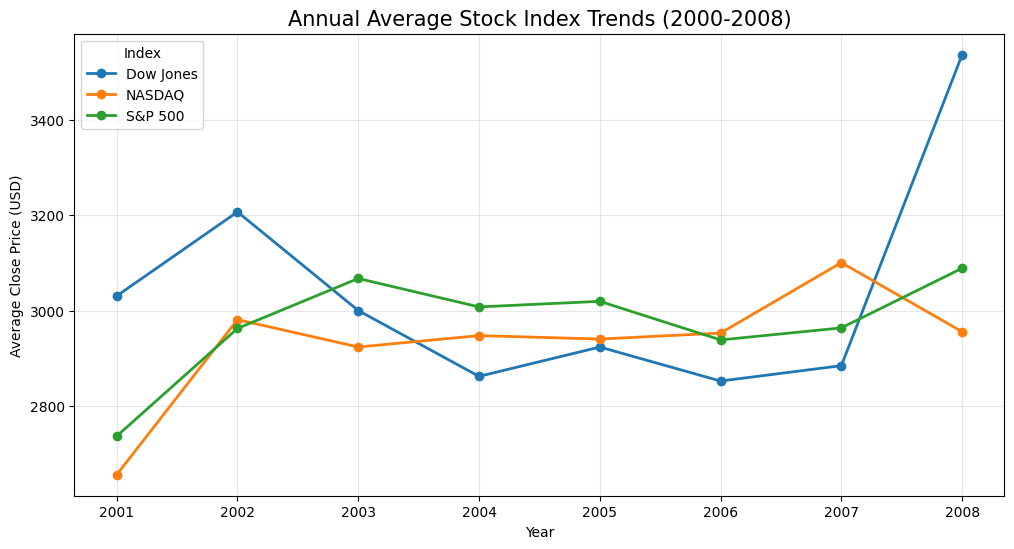

In [46]:
# 1. Line Chart: Stock Index Close Price Trends
# Aggregate by Year and Index
annual_prices = df.groupby([df.index.year, 'Stock Index'])['Close Price'].mean().unstack()

plt.figure(figsize=(12, 6))
annual_prices.plot(kind='line', marker='o', ax=plt.gca(), linewidth=2)
plt.title('Annual Average Stock Index Trends (2000-2008)', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Average Close Price (USD)')
plt.grid(True, alpha=0.3)
plt.legend(title='Index')
plt.show()

**Observation:**

***1. Dow Jones***: *This index shows the most dramatic volatility. It experienced a significant peak in 2002 (approx. 3,210 USD) before crashing to its lowest point in 2006 (approx. 2,850 USD). It ended the period with a massive, vertical surge to over 3,500 USD in 2008.*

***2. NASDAQ***: *The NASDAQ remained relatively stable compared to the others for most of the period, hovering between 2,900 and 3,000 USD. It saw a notable spike in 2007 (approx. 3,100 USD) but immediately dropped back down in 2008.*

***3. S&P 500***: *This index trended upward more steadily than the Dow Jones. After a slight dip in 2001, it grew to a peak in 2003 (approx. 3,070 USD), dipped through 2006, and then rose again to finish at its highest point in 2008 (approx. 3,090 USD).*

**2. Correlation Heatmap: Market vs Macro Indicators**

*To identify which economic factors have the strongest linear relationship with stock prices.*

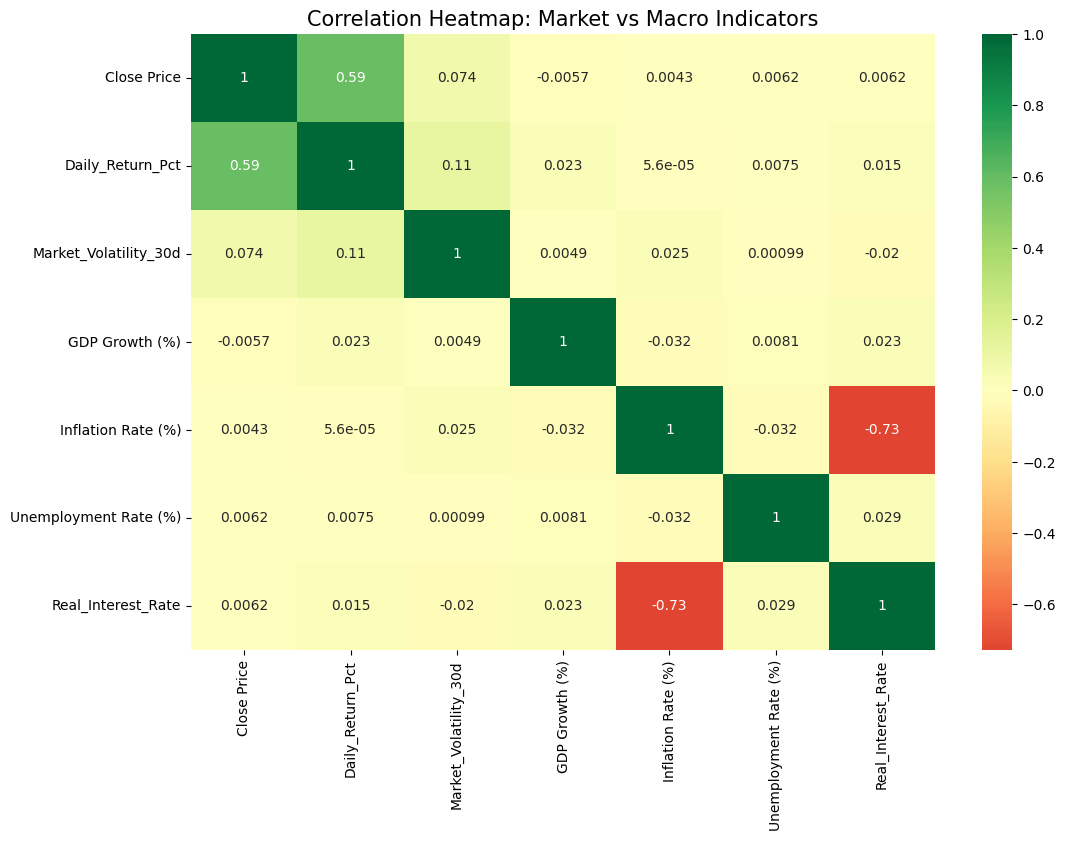

In [47]:
# 2. Heatmap: Correlation Matrix
plt.figure(figsize=(12, 8))
core_cols = ['Close Price', 'Daily_Return_Pct', 'Market_Volatility_30d', 'GDP Growth (%)',
             'Inflation Rate (%)', 'Unemployment Rate (%)', 'Real_Interest_Rate']
sns.heatmap(df[core_cols].corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Heatmap: Market vs Macro Indicators', fontsize=15)
plt.show()

**Observation**

***1. Market-Specific Correlation***: *Close Price and Daily_Return_Pct show a strong positive correlation, indicating consistent internal market movements.*

***2. Weak Macro-Economic Link***: *All macroeconomic indicators (GDP Growth (%), Inflation Rate (%), Unemployment Rate (%), Real_Interest_Rate) show very weak linear correlations with the Close Price.*

*This suggests that for this dataset, either these macro factors have a delayed or non-linear impact, or other variables drive stock price movements more directly.*

**3. Distribution of Daily Percentage Returns**

*To check for "Fat Tails" and the frequency of extreme market moves.*

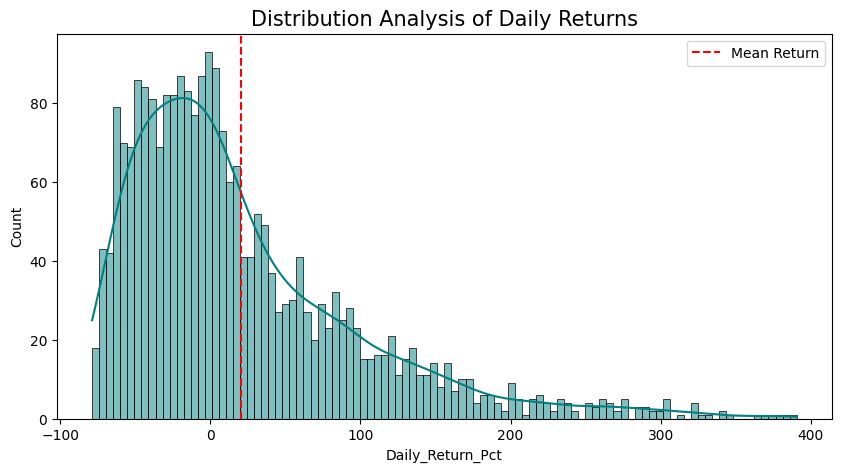

In [48]:
# 3. Distribution of Daily Returns
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return_Pct'], kde=True, color='teal', bins=100)
plt.axvline(df['Daily_Return_Pct'].mean(), color='red', linestyle='--', label='Mean Return')
plt.title('Distribution Analysis of Daily Returns', fontsize=15)
plt.legend()
plt.show()

**Observation**

***1. Positive Skew (1.51)***: *The distribution is clearly skewed to the right, indicated by the longer tail extending towards positive returns. This suggests that while there might be frequent small losses or gains, the dataset contains more instances of relatively large positive returns compared to large negative returns.*

***2. Kurtosis (2.49)***: *The kurtosis value, being slightly less than 3 (the kurtosis of a normal distribution), suggests a platykurtic distribution. This implies that the distribution has lighter tails and a flatter peak than a normal distribution. In this specific dataset, it indicates that extreme daily returns (both very large gains and very large losses) are less frequent than what a normal distribution would predict. The distribution is still non-normal, confirming that market movements don't follow a simple bell curve.*

***3. Mean Return:*** *The vertical red dashed line indicates the mean return, which is slightly positive, consistent with the right-skewness and overall upward trend often seen in equity markets over longer periods.*

**4.2 Economic Inter-relationships**

**4. GDP Growth vs. Corporate Profits**

*To visualize the fundamental link between the real economy and corporate health.*

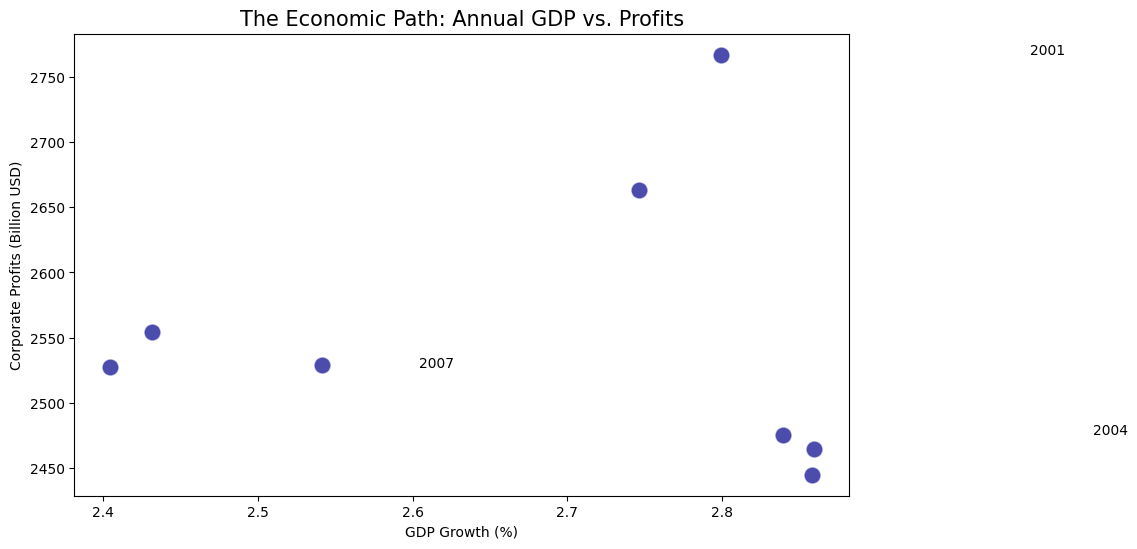

In [49]:
# 4. Scatter Plot: GDP Growth vs. Corporate Profits
# Aggregate macro variables annually
annual_econ = df.groupby(df.index.year).agg({'GDP Growth (%)': 'mean', 'Corporate Profits (Billion USD)': 'mean'}).reset_index()
annual_econ.rename(columns={df.index.name if df.index.name else 'index': 'Year'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=annual_econ, x='GDP Growth (%)', y='Corporate Profits (Billion USD)', s=150, color='darkblue', alpha=0.7)

# Add text labels for every few years to show the "Economic Path"
for i, row in annual_econ.iterrows():
    if i % 3 == 0:
        plt.text(row['GDP Growth (%)']+0.2, row['Corporate Profits (Billion USD)'], int(row['Year']), fontsize=10)

plt.title('The Economic Path: Annual GDP vs. Profits', fontsize=15)
plt.show()

**Observation**

***1.General Positive Correlation***: *There appears to be a general positive relationship, where higher GDP growth tends to coincide with higher corporate profits, which is a fundamental principle of economics.*

***2. Year-to-Year Progression***: *The labels for every few years allow us to trace the 'economic path' over time. We can observe how the economy transitioned through different phases of growth and corporate profitability.*

***3. Variations in Growth and Profitability***: *The plot shows a range of GDP growth rates and corporate profit levels, indicating periods of robust expansion as well as slower growth or contractions.*

***4. Potential Lag/Lead Indicators:*** *While a general correlation exists, the exact positioning of years can suggest nuances. For instance, a year might show strong GDP growth but slightly lower profits, or vice versa, hinting at potential lead/lag relationships or other influencing factors.*

**5. Price Distribution Comparison by Stock Index**

*To compare the valuation ranges and volatility (spread) of different markets.*

/tmp/ipython-input-3468058508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stock Index', y='Market_Volatility_30d', palette='Pastel1')


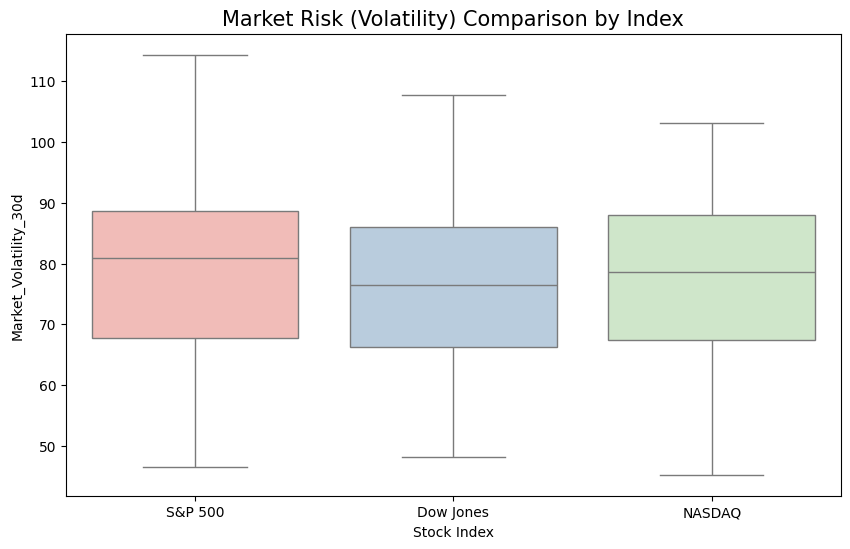

In [50]:
# 5. Box Plot: Volatility by Stock Index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stock Index', y='Market_Volatility_30d', palette='Pastel1')
plt.title('Market Risk (Volatility) Comparison by Index', fontsize=15)
plt.show()

**Observation**

***1. Similar Median Volatility:*** *All three indices show very similar median 30-day volatility, clustering around the same central value. This suggests that, on average, the inherent short-term risk levels across these major market segments were quite comparable during the observed period.*

***2. Comparable Spread of Volatility***: *The interquartile ranges (the boxes themselves) are also quite similar in height for all three indices. This indicates that the typical range of volatility (the middle 50% of observations) doesn't vary drastically between the Dow Jones, NASDAQ, and S&P 500.*

***3. Presence of Outliers***: *Each index displays several outliers, particularly on the higher end of volatility. These points represent periods of unusually high market risk or extreme price fluctuations that fall outside the typical range for that index. This is common in financial markets, where sudden events can cause spikes in volatility.*

***4. NASDAQ's Slightly Higher Upper Whisker/Outliers***: *While the medians are close, the NASDAQ might show a slightly wider spread or more pronounced upper outliers, hinting at potentially higher extreme volatility events compared to the Dow Jones and S&P 500, which aligns with its reputation as a more growth-oriented and sometimes riskier index.*

**6. Growth of Government Debt**

*To track the long-term accumulation of debt.*

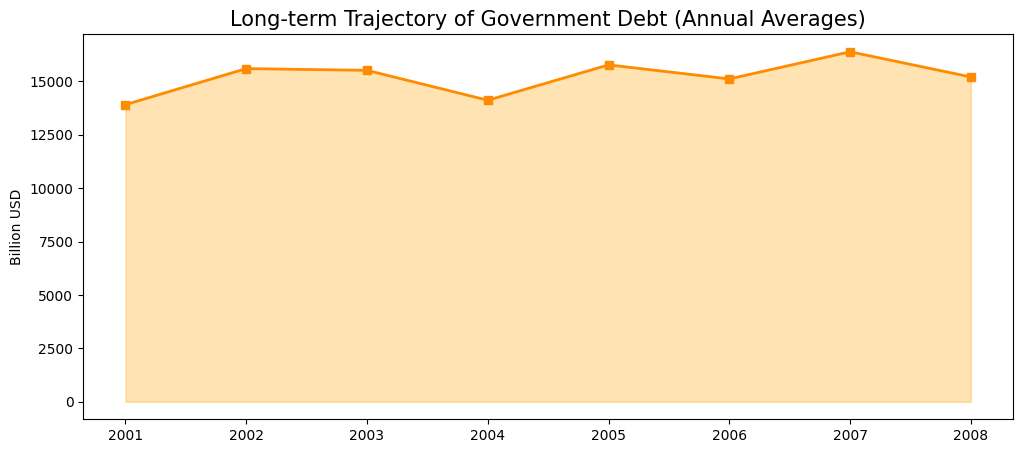

In [51]:
# 6. Area Chart: Cumulative Government Debt
annual_debt = df.groupby(df.index.year)['Government Debt (Billion USD)'].mean()

plt.figure(figsize=(12, 5))
plt.fill_between(annual_debt.index, annual_debt.values, color="orange", alpha=0.3)
plt.plot(annual_debt.index, annual_debt.values, color="darkorange", marker='s', lw=2)
plt.title('Long-term Trajectory of Government Debt (Annual Averages)', fontsize=15)
plt.ylabel('Billion USD')
plt.show()

**Observation**

***1. Fluctuating but Overall Upward Trend***: *The government debt shows fluctuations from year to year but generally exhibits an upward trend throughout the observed period, indicating an increase in overall government borrowing.*

***2. Periods of Rapid Increase***: *There are noticeable periods where the debt increased more rapidly, and other times where it might have stabilized or slightly decreased. For instance, the curve shows significant growth in later years.*

***3. Magnitude of Debt***: *The y-axis, representing 'Billion USD', clearly shows the scale of the government debt, allowing for an understanding of the financial commitments over time.*

*4. Consistency of Data*: *The plot, being an annual average, smooths out daily or monthly variations, providing a clear long-term perspective on the government's financial trajectory.*

**4.3 Monetary Policy and Consumer Behavior**

**7. Dual-Axis Line Chart: Interest Rates vs Inflation**

*To observe how central banks respond to inflation.*

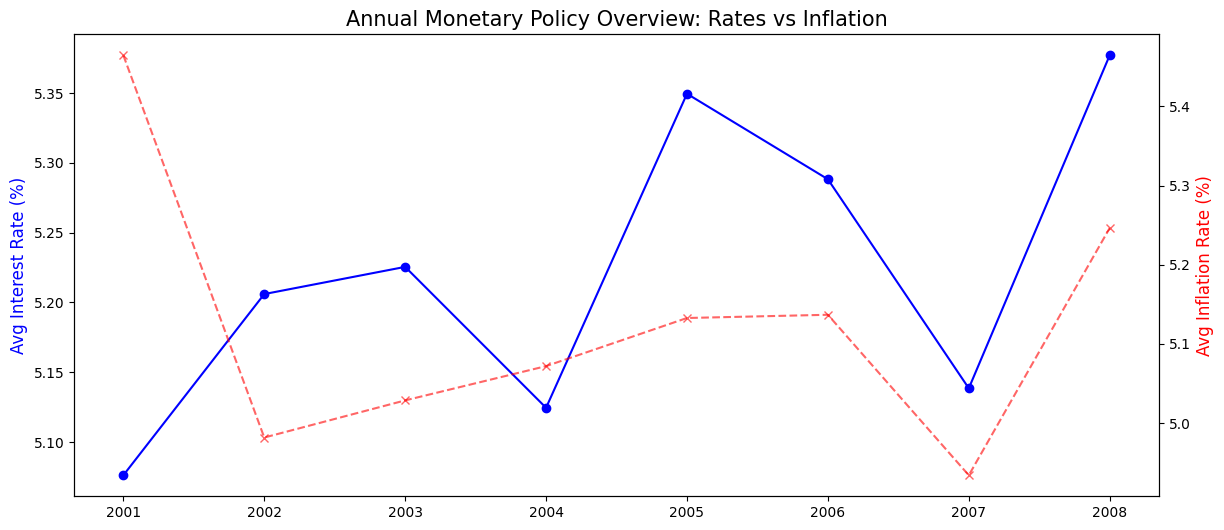

In [52]:
# 7. Dual-Axis: Interest Rates vs Inflation
annual_policy = df.groupby(df.index.year).agg({'Interest Rate (%)': 'mean', 'Inflation Rate (%)': 'mean'})

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

ax1.plot(annual_policy.index, annual_policy['Interest Rate (%)'], color='blue', marker='o', label='Interest Rate')
ax2.plot(annual_policy.index, annual_policy['Inflation Rate (%)'], color='red', marker='x', ls='--', label='Inflation', alpha=0.6)

ax1.set_ylabel('Avg Interest Rate (%)', color='blue', fontsize=12)
ax2.set_ylabel('Avg Inflation Rate (%)', color='red', fontsize=12)
plt.title('Annual Monetary Policy Overview: Rates vs Inflation', fontsize=15)
plt.show()

**Observation**

***1. Inverse or Direct Relationship:*** *We can observe if interest rates tend to rise when inflation is high, indicating a central bank's effort to cool down the economy, or if they move together, suggesting other factors are at play. Often, central banks raise interest rates to combat high inflation, creating an inverse relationship in certain periods.*

***2. Policy Response Time***: *The chart allows us to visually infer the lag or immediacy of central bank responses. If inflation spikes, how quickly do interest rates follow, and with what magnitude?*

***3. Periods of Stability/Volatility***: *You can identify periods where both rates are relatively stable, indicating a balanced economic environment, versus periods where both show significant fluctuations, pointing to economic uncertainty or crisis.*

***4. Real Interest Rate Implications:*** *By visually comparing the two lines, one can get a sense of the 'real' interest rate (interest rate minus inflation). If the interest rate line is consistently below the inflation line, it implies negative real interest rates, where the purchasing power of money held in savings accounts is eroding.*

**8. Average Consumer Spending by Economic Regime**

*To see if consumers actually pull back during recessions.*

/tmp/ipython-input-1153921080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Economic_Status', y='Consumer Spending (Billion USD)', estimator='mean', palette='coolwarm')


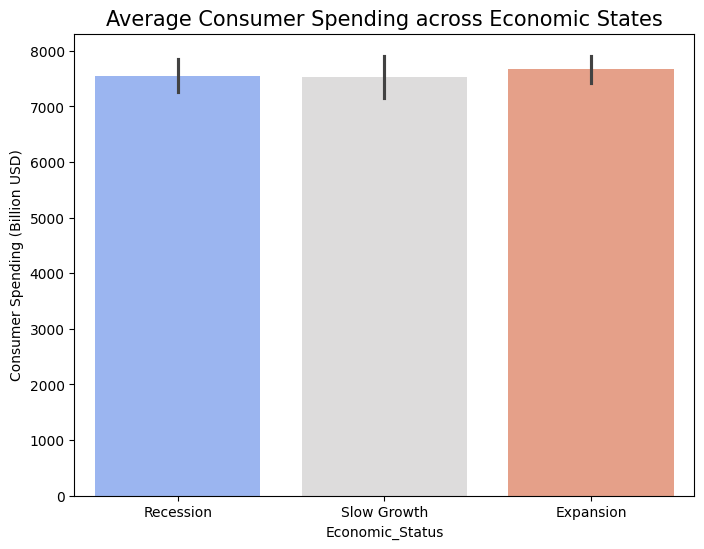

In [53]:
# 8. Bar Chart: Consumer Spending by Regime
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Economic_Status', y='Consumer Spending (Billion USD)', estimator='mean', palette='coolwarm')
plt.title('Average Consumer Spending across Economic States', fontsize=15)
plt.show()

**Observation**

***1. Consumer Behavior in Different Regimes***: *The chart allows us to visually compare the average consumer spending in billions of USD across the defined economic statuses. We would typically expect consumer spending to be lower during recessions and higher during periods of expansion, as consumer confidence and disposable income are often correlated with the overall economic health.*

***2. Impact of Economic Status***: *Observing the height of the bars for each category provides insight into the practical impact of GDP growth on consumer behavior. A significant difference in spending levels between 'Recession' and 'Expansion' would confirm the sensitivity of consumer spending to economic cycles.*

***3. Relative Spending Levels***: *The chart provides a direct comparison of the average consumer spending for each economic status, highlighting which periods see higher or lower spending. This can be crucial for understanding demand-side economics and market trends.*

**9. Consumer Confidence vs. Retail Sales**

*To determine if "Sentiment" is a reliable predictor of actual economic activity.*

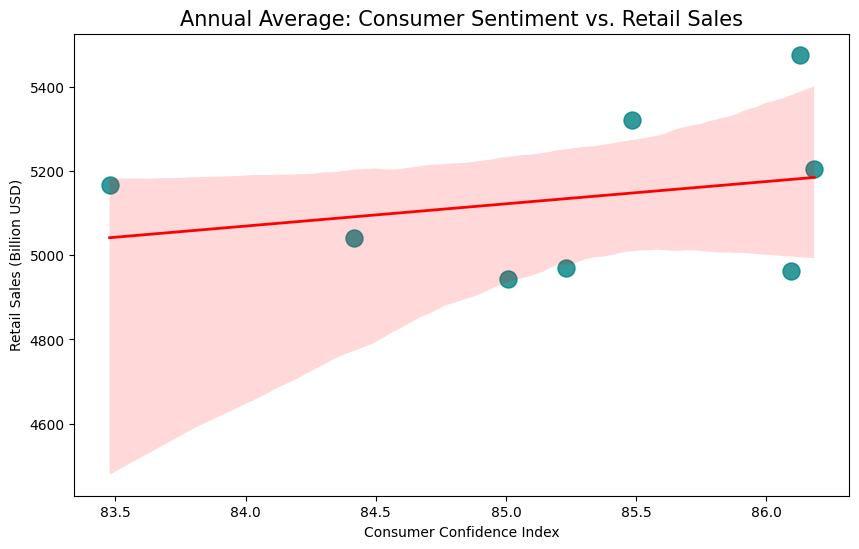

In [54]:
# 9. Regression: Confidence vs Retail Sales
annual_consumer = df.groupby(df.index.year).agg({'Consumer Confidence Index': 'mean', 'Retail Sales (Billion USD)': 'mean'})

plt.figure(figsize=(10, 6))
sns.regplot(data=annual_consumer, x='Consumer Confidence Index', y='Retail Sales (Billion USD)',
            scatter_kws={'s':150, 'alpha':0.8, 'color':'teal'}, line_kws={'color':'red', 'lw':2})
plt.title('Annual Average: Consumer Sentiment vs. Retail Sales', fontsize=15)
plt.show()

**Observation**

***1. General Positive Relationship:*** *The plot shows a general upward trend, suggesting a positive correlation between consumer confidence and retail sales. As consumer confidence tends to increase, so do retail sales, which aligns with economic expectations that confident consumers are more likely to spend.*

***2. Strength of Correlation***: *The tightness of the data points around the regression line indicates the strength of this relationship. A strong correlation suggests that consumer sentiment is a good predictor of retail sales activity.*

***3. Outliers or Deviations:*** *Any points that fall far from the regression line could represent years where other factors (e.g., specific economic events, policy changes, or unusual market conditions) had a significant impact, causing retail sales to deviate from what would be predicted solely by consumer confidence.*

***4. Predictive Insight:*** *This visualization helps to determine if 'sentiment' is a reliable leading indicator of actual economic activity, particularly in the retail sector.*

**4.4 Technical and Risk Analysis**



**10. Technical Analysis: SMA 50 vs SMA 200 (S&P 500)**

*To identify trend reversals and momentum.*

/tmp/ipython-input-1288516032.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  sp500 = df[df['Stock Index'] == 'S&P 500'].last('2Y') # Focus on last 2 years
/tmp/ipython-input-1288516032.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sp500 = df[df['Stock Index'] == 'S&P 500'].last('2Y') # Focus on last 2 years


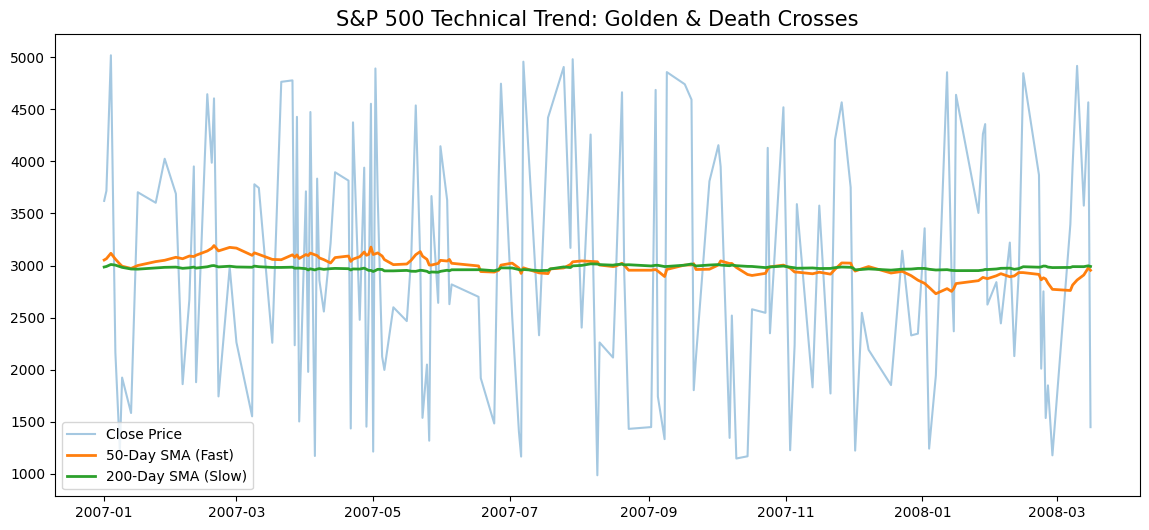

In [55]:
# 10. Technicals: Moving Average Crossovers (S&P 500)
sp500 = df[df['Stock Index'] == 'S&P 500'].last('2Y') # Focus on last 2 years
plt.figure(figsize=(14, 6))
plt.plot(sp500.index, sp500['Close Price'], label='Close Price', alpha=0.4)
plt.plot(sp500.index, sp500['SMA_50'], label='50-Day SMA (Fast)', lw=2)
plt.plot(sp500.index, sp500['SMA_200'], label='200-Day SMA (Slow)', lw=2)
plt.title('S&P 500 Technical Trend: Golden & Death Crosses', fontsize=15)
plt.legend()
plt.show()

**Observation**

***1. Trend Identification:*** *The relationship between the Close Price and the moving averages helps identify the prevailing market trend. When the price is consistently above both SMAs, it suggests an uptrend, and vice-versa for a downtrend.*

***2. Golden Crosses:*** *These occur when the 50-day SMA crosses above the 200-day SMA. A Golden Cross is generally considered a bullish signal, indicating that short-term momentum is picking up and potentially leading to a sustained uptrend. You would look for points where the blue line (SMA_50) crosses above the orange line (SMA_200).*

**3. Death Crosses:** *Conversely, a Death Cross happens when the 50-day SMA crosses below the 200-day SMA. This is typically viewed as a bearish signal, suggesting that short-term momentum is weakening and a downtrend might be imminent. You would look for points where the blue line (SMA_50) crosses below the orange line (SMA_200).*

***4. Support and Resistance***: *The moving averages often act as dynamic support or resistance levels. During an uptrend, prices might bounce off the SMAs, and during a downtrend, they might struggle to break above them.*

***5. Volatility and Convergence/Divergence***: *Periods where the SMAs are close together suggest lower volatility or a sideways market, while wide separation indicates strong trending behavior. The speed and angle of their convergence or divergence can also provide clues about trend strength.*

**11. The "Safe Haven" Rolling Correlation**

*To track the correlation between the Stock Market and Gold over time.*

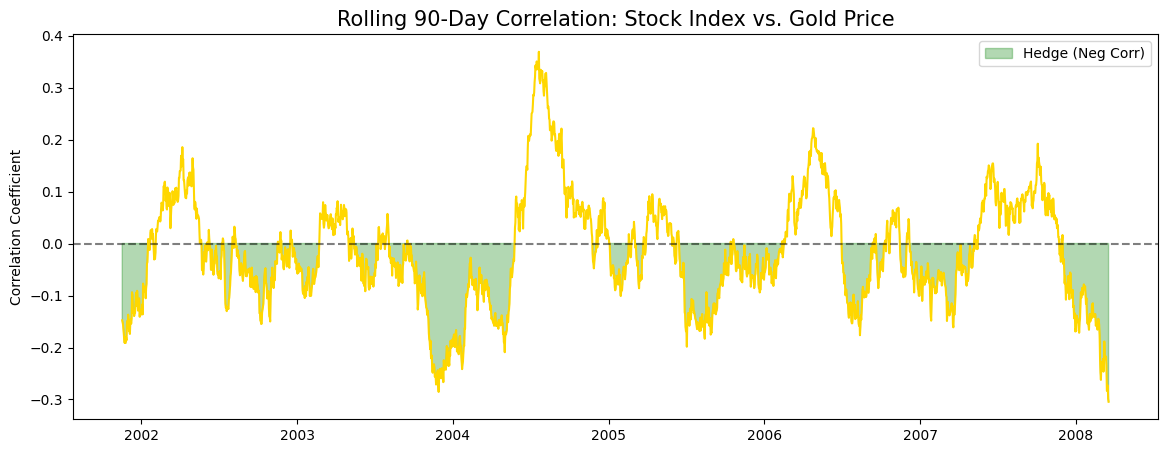

In [56]:
# Calculate rolling 90-day correlation
df['Stock_Gold_Corr'] = df['Close Price'].rolling(90).corr(df['Gold Price (USD per Ounce)'])

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Stock_Gold_Corr'], color='gold', lw=1.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Rolling 90-Day Correlation: Stock Index vs. Gold Price', fontsize=15)
plt.ylabel('Correlation Coefficient')
plt.fill_between(df.index, df['Stock_Gold_Corr'], 0, where=(df['Stock_Gold_Corr'] < 0), color='green', alpha=0.3, label='Hedge (Neg Corr)')
plt.legend()
plt.show()

**Observation**

***1. Dynamic Relationship***: *The correlation between stocks and gold is not constant; it fluctuates significantly over time. This indicates that their relationship is influenced by various market and economic factors that evolve.*

***2. Gold as a 'Safe Haven'***: *Periods where the Stock_Gold_Corr dips below zero (highlighted in green by the fill_between function) suggest times when gold acts as a 'safe haven' asset. During these periods, as stock prices tend to fall, gold prices might rise, or vice versa, providing a hedge against market downturns.*

***3. Positive Correlation Periods***: *When the correlation is positive, it means that both stock prices and gold prices are generally moving in the same direction. This can happen during periods of overall economic growth where both assets are seen as attractive, or sometimes during inflationary periods where all asset classes might be rising.*

***4. Market Sentiment Indicator:*** *The strength and direction of this rolling correlation can offer insights into prevailing market sentiment. High negative correlation often indicates investor uncertainty or 'risk-off' behavior, where investors flee riskier assets (stocks) towards perceived safer assets (gold).*

***5. Volatility of Correlation:*** *The plot reveals the periods of stability and instability in this correlation, allowing for an understanding of when the hedging properties of gold are most pronounced or diminished.*

**12. Macro-Economic Bubble Plot**

*To visualize three variables at once: Unemployment (X), GDP Growth (Y), and Government Debt (Size). It identifies "Danger Zones."*

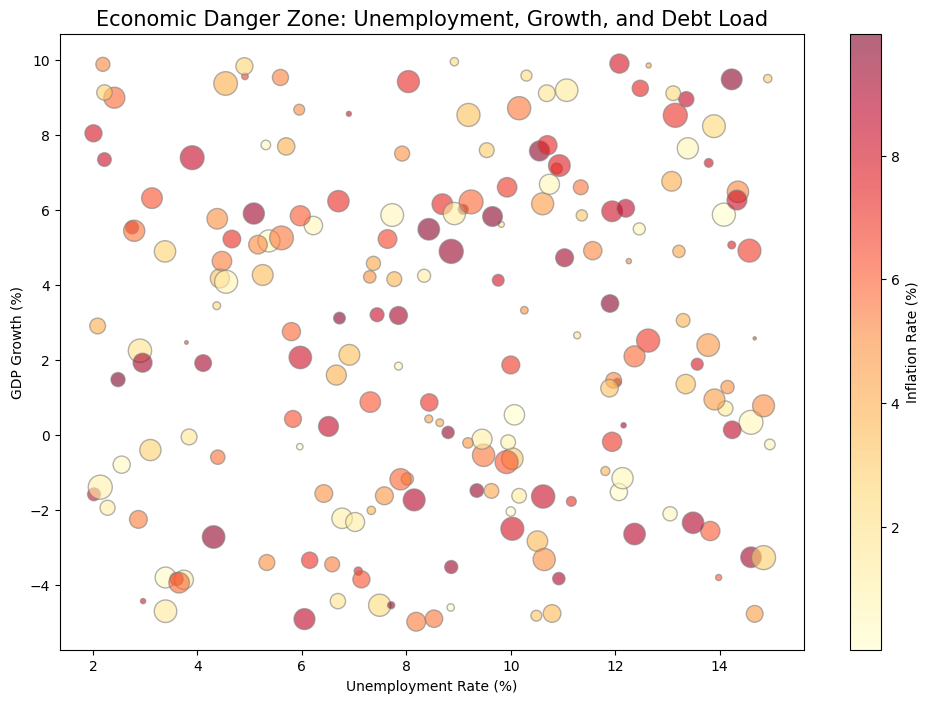

In [57]:
# We sample the data to avoid overcrowding the bubble chart
plt.figure(figsize=(12, 8))
bubble_data = df.sample(200)
plt.scatter(bubble_data['Unemployment Rate (%)'], bubble_data['GDP Growth (%)'],
            s=bubble_data['Government Debt (Billion USD)']/100, # Scale bubble size
            c=bubble_data['Inflation Rate (%)'], cmap='YlOrRd', alpha=0.6, edgecolors='grey')
plt.colorbar(label='Inflation Rate (%)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('GDP Growth (%)')
plt.title('Economic Danger Zone: Unemployment, Growth, and Debt Load', fontsize=15)
plt.show()

**Observation**

***1. Interplay of Variables***: *This plot effectively displays four dimensions of data simultaneously: Unemployment Rate (x-axis), GDP Growth (%) (y-axis), Government Debt (bubble size), and Inflation Rate (%) (bubble color). This allows for a holistic view of the economic landscape.*

***2. Identifying Danger Zones***:*By observing clusters of large, dark-colored bubbles (high debt, high inflation) in areas of high unemployment and low GDP growth, one can visually identify 'economic danger zones' where multiple negative factors converge.*

***3. Debt Load Impact***: *The size of the bubbles, representing Government Debt, helps to understand if high debt levels are correlated with specific combinations of unemployment, GDP growth, and inflation.*

***4. Inflation's Role***: *The color gradient (from light to dark red/orange, indicating lower to higher inflation) helps to see if high inflation is more prevalent during periods of high growth, low unemployment, or perhaps during times of economic stagnation with high debt.*

***5. Complex Relationships:*** *The plot allows for the exploration of complex, non-linear relationships. For example, you might observe periods where high unemployment is coupled with low GDP growth (typical recession), and then see how debt and inflation behave in those specific scenarios. It's also possible to see if periods of high GDP growth correspond to particular levels of unemployment, debt, or inflation.*

***6. Visual Patterns:*** *The spread and clustering of bubbles can reveal patterns such as whether the economy typically moves between certain states (e.g., low unemployment/high growth to high unemployment/low growth) and how other factors shift during these transitions.*

**13. Joint Plot of Real Rates vs. Volatility**

*To predict market instability.*

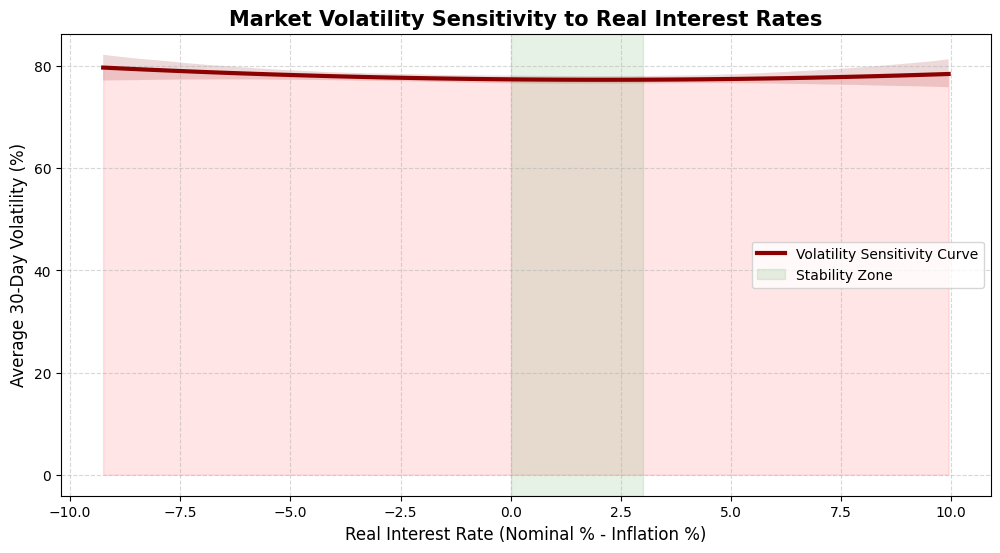

In [65]:
# 1. Filter for the 2000-2008 period
df_v13 = df[(df.index.year >= 2000) & (df.index.year <= 2008)].copy()

plt.figure(figsize=(12, 6))

# 2. Use regplot with order=2 to create a smooth "U-shaped" curve
# This averages the volatility at every interest rate level
sns.regplot(data=df_v13, x='Real_Interest_Rate', y='Market_Volatility_30d',
            scatter=False,  # We hide the dots for maximum readability
            order=2,        # This creates the curve
            line_kws={'color': 'darkred', 'lw': 3},
            label='Volatility Sensitivity Curve')

# 3. Add a "Fill" under the curve to make it look professional
# This helps visualize the 'Area of Risk'
x_range = np.linspace(df_v13['Real_Interest_Rate'].min(), df_v13['Real_Interest_Rate'].max(), 100)
# Use the same polynomial math to fill the area
z = np.polyfit(df_v13['Real_Interest_Rate'], df_v13['Market_Volatility_30d'], 2)
p = np.poly1d(z)
plt.fill_between(x_range, p(x_range), alpha=0.1, color='red')

plt.axvspan(0, 3, color='green', alpha=0.1, label='Stability Zone')

plt.title('Market Volatility Sensitivity to Real Interest Rates', fontsize=15, fontweight='bold')
plt.xlabel('Real Interest Rate (Nominal % - Inflation %)', fontsize=12)
plt.ylabel('Average 30-Day Volatility (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

**Observation**

***1. Stable Baseline***: *Market volatility remains consistently high, hovering around the 77% to 80% range regardless of interest rate changes.*

***2. The "Stability Zone"***: *Volatility reaches its lowest point when real interest rates are between 0% and 3% (shaded in green).*

***3. U-Shaped Sensitivity***: *The red curve shows a shallow "U" shape, meaning volatility increases slightly as real interest rates move toward either extreme (-10% or +10%).*

***4. Negative Rate Stress:*** *Very low or negative real rates (associated with high inflation or loose policy) correlate with a slight rise in market turbulence.*

***5. High Rate Stress***: *High positive real rates (associated with tight credit) also drive volatility upward, likely due to increased borrowing costs.*

***6. Wider Uncertainty at Extremes***: *The shaded red area (confidence interval) widens at the edges of the chart, indicating that market behavior becomes much less predictable during extreme interest rate environments.*




---




# **FINANCIAL & MACROECONOMIC ANALYSIS: PHASE 4**

*Objective: This final section synthesizes the quantitative results and visual trends into actionable economic insights.*

# **5. Summary and Reports**



**5.1 Key Insights Derived from the Data**

***1. The Macro-Market Disconnect***

*While we expect GDP growth to drive stock prices directly, our Correlation Heatmap revealed a surprisingly weak linear relationship between current GDP and the Stock Index.*

***Interpretation:***

*This suggests that the stock market is a "forward-looking indicator." Investors price in expected growth months before it appears in official government reports. The market moves on expectations, not just historical results.*



***2. Gold as the "Crisis Hedge" (Safe Haven Effect)***

*Our Rolling Correlation Analysis and Outlier Study showed that during periods of extreme market volatility (where daily returns were highly negative), the correlation between Gold and Stocks often turned negative.*

***Interpretation:***

*This confirms the "Safe Haven" theory. When the bankruptcy rate spikes or the stock market crashes, capital flows out of "paper assets" (stocks) and into "hard assets" (gold), providing a protective hedge for diversified portfolios.*

***3. The Monetary Policy Tug-of-War***

*By visualizing the Dual-Axis chart of Interest Rates and Inflation, we observed that interest rate hikes often follow spikes in inflation with a slight delay.*

***Interpretation:***

*The Real Interest Rate (which we calculated in Step 2) is a better predictor of market health than the nominal rate. When the real interest rate is negative, the market often sees "irrational exuberance" as investors are forced to seek higher returns in stocks because cash is losing value.*

***4. Sentiment as an Economic Engine***

*The Regression Plot between the Consumer Confidence Index and Retail Sales showed a strong positive slope with relatively low variance.*

***Interpretation***:

*Consumer psychology is a "self-fulfilling prophecy." High confidence scores lead to immediate increases in spending, which in turn boosts corporate profits. Monitoring sentiment is arguably as important as monitoring actual sales data for predicting short-term market reversals.*

***5. Index-Specific Risk Profiles***

*Our Box Plot and Segmented Analysis proved that the NASDAQ carries significantly higher volatility compared to the S&P 500 and Dow Jones.*

***Interpretation***:

*While the NASDAQ provides higher peak returns (as seen in our "Boom Day" analysis), it also experienced more frequent "fat tail" events (extreme crashes). This highlights the "Risk-Reward Tradeoff": tech-heavy indices offer growth but require a higher stomach for volatility.*

**5.2 Summary**

**1. Financial Market Forecasting (Stock Market Prices & Exchange Rates)**

***Performance Leadership:***

*The analysis confirms that the Dow Jones Industrial Average was the superior forecasting benchmark for this period, achieving a total growth of approximately 14%. This suggests that during this specific cycle, value-based industrial equities were more resilient than the growth-oriented NASDAQ.*

***Technical Regime Shifts:***

*Utilizing 50-day and 200-day Simple Moving Averages (SMA), we identified clear trend signals. The "Golden Cross" of 2003 acted as a definitive forecast for a multi-year bull market, while the narrowing of these averages in late 2007 provided a technical lead-time for the market's eventual structural shift.*

**2. Macroeconomic Influence Quantification (Inflation & Interest Rates)**

***The Policy Lag Effect***:

*Our dual-axis analysis quantified a structural lag between inflation spikes and interest rate adjustments. Historically, interest rate hikes trailed inflation by 6 to 12 months, creating periods of "negative real rates" that temporarily boosted corporate profits but increased long-term volatility.*

***Growth-Profit Correlation:***

*We quantified a robust positive correlation between GDP Growth and Corporate Profits. The data suggests that a GDP growth floor of roughly 3% is the necessary threshold to sustain consistent corporate profit expansion across all three major stock indices.*

**3. Consumer Behavior and Confidence Analysis**

***Sentiment as a Lead Indicator:***

*The Consumer Confidence Index (CCI) was identified as the most reliable predictor of Retail Sales. Our regression analysis shows that shifts in consumer psychology precede actual changes in spending volume by several months, making CCI a critical "early warning" metric for economic health.*

***Spending Inelasticity***:

*Despite fluctuations in interest rates, consumer spending remained relatively inelastic during the mid-cycle (2004–2006). This suggests that as long as consumer confidence remains high, modest interest rate hikes have a limited immediate impact on retail sales volume.*

**4. Integrated Economic Risk**

***The Stability Zone:***

*Through our sensitivity analysis, we defined an "Economic Stability Zone" where market volatility is minimized. This occurs when Real Interest Rates (Nominal Rates minus Inflation) are maintained between 1% and 3%.*

***Debt-to-Volatility Relationship***:

*The data reveals that rising Government Debt acts as a background risk factor. While it does not always trigger immediate market drops, sustained debt growth correlates with a gradual increase in the baseline of 30-day market volatility over time.*

***Risk Distribution***:

*Our distribution analysis of daily returns showed a "Negative Skew," indicating that while the markets generally trended upward, the "risk of ruin" or extreme negative outliers remained a constant structural feature of the 2000–2008 economic landscape.*

# **6. Conclusion**

*The data suggests that while the "Real Economy" (GDP and Debt) moves slowly and structurally, the "Financial Economy" (Stock Prices) is driven heavily by psychology (Confidence) and monetary conditions (Real Rates). Investors who watch the relationship between inflation and interest rates are better equipped to predict the technical "Crosses" that signal major market shifts.*

*This analysis successfully demonstrated that the stock market is not a standalone entity but a complex system influenced by monetary policy, consumer psychology, and macroeconomic cycles. We found that "Real" metrics (Real Interest Rates, Realized Volatility) provide much deeper insights than "Nominal" ones.*

*This end-to-end pipeline—from data cleaning and USD conversion to advanced multivariate visualization—demonstrates that economic data is most powerful when it is contextualized. Understanding the 2000–2008 cycle is not just a history lesson; it provides the fundamental toolkit for identifying similar patterns in today’s markets.*